# PS2: Linear Models and Validation

**Your Name:** [Insert Your Name here]

**People I discussed this assignment with:** [Put "None" if you didn't discuss this with anyone, otherwise list the names of folks you talked about this problem set with]

# Preamble
We'll be loading some CO2 concentration data that is a commonly used dataset for model building of time series prediction. You will build a few baseline linear models and assess them using some of the tools we discussed in class. Which model is best? Let's find out.

First let's just load the data and take a look at it:

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from datetime import datetime, timedelta
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_context('notebook')

# Fetch the data 
mauna_lao = fetch_openml('mauna-loa-atmospheric-co2', as_frame = False)
print(mauna_lao.DESCR)
data = mauna_lao.data
# Assemble the day/time from the data columns so we can plot it
d1958 = datetime(year=1958,month=1,day=1)
time = [datetime(int(d[0]),int(d[1]),int(d[2])) for d in data] 
X = np.array([1958+(t-d1958)/timedelta(days=365.2425) for t in time]).T
X = X.reshape(-1,1)  # Make it a column to make scikit happy
y = np.array(mauna_lao.target)

**Weekly carbon-dioxide concentration averages derived from continuous air samples for the Mauna Loa Observatory, Hawaii, U.S.A.**<br><br>
These weekly averages are ultimately based on measurements of 4 air samples per hour taken atop intake lines on several towers during steady periods of CO2 concentration of not less than 6 hours per day; if no such periods are available on a given day, then no data are used for that day. The _Weight_ column gives the number of days used in each weekly average. _Flag_ codes are explained in the NDP writeup, available electronically from the [home page](http://cdiac.ess-dive.lbl.gov/ftp/trends/co2/sio-keel-flask/maunaloa_c.dat) of this data set. CO2 concentrations are in terms of the 1999 calibration scale (Keeling et al., 2002) available electronically from the references in the NDP writeup which can be accessed from the home page of this data set.
<br><br>
### Feature Descriptions
_co2_: average co2 concentration in ppvm <br>
_year_: year of concent

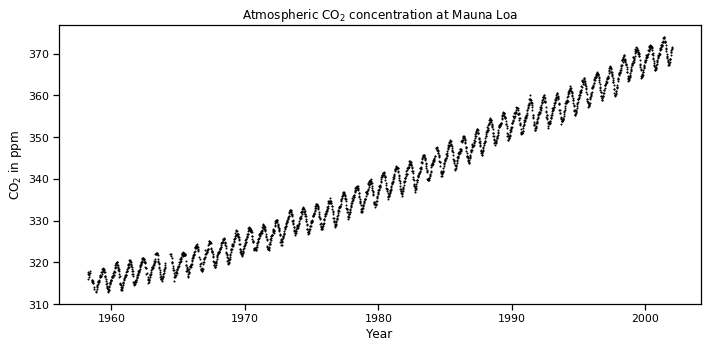

In [2]:
# Plot the data
plt.figure(figsize=(10,5))    # Initialize empty figure
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Linear Models

Construct the following linear models:
1. Model 1: "Vanilla" Linear Regression, that is, where $CO_2 = a+b \cdot time$
2. Model 2: Quadratic Regression, where $CO_2 = a+b \cdot t + c\cdot t^2$
3. Model 3: A more complex "linear" model with the following additive terms $CO_2=a+b\cdot t+c\cdot sin(\omega\cdot t)$:
  * a linear (in time) term
  * a sinusoidal additive term with period such that the peak-to-peak of the sinsusoid is roughly ~1 year and phase shift of zero (set $\omega$ as appropriate to match the peaks)
4. Model 4: A "linear" model with the following additive terms ($CO_2=a+b\cdot t+c\cdot t^2+d\cdot sin(\omega\cdot t)$:
  * a quadratic (in time) polynomial
  * a sinusoidal additive term with period such that the peak-to-peak of the sinsusoid is roughly ~1 year and phase shift of zero (set $\omega$ as appropriate to match the peaks)
  
Evauate these models using **the appropriate kind of Cross Validation** for each of the following amounts of Training data:
1. N=50 Training Data Points
2. N=100
3. N=200
4. N=500
5. N=1000
6. N=2000

**Question**: Before you even construct the models or do any coding below, what is your initial guess or intuition behind how each of those four models will perform? Note: there is no right or wrong answer to this part of the assignment and this question will only be graded on completeness, not accuracy. It's intent is to get you to think about and write down your preliminary intuition regarding what you think will happen before you actually implement anything, based on your approximate understanding of how functions of the above complexity *should* perform as N increases.

**Student Response:** [Insert your response here]

**Question**: What is the appropriate kind of Cross Validation to perform in this case if we want a correct Out of Sample estimate of our Test MSE?

**Student Response:** [Insert your response here]

Now, for each of the above models and training data sizes:
* Plot the predicted CO2 as a function of time, including the actual data, for each of the N=X training data examples. This should correspond to six plots (one for each amount of training data) if you plot all models on the same plot, or 6x4 = 24 plots if you plot each model and training data plot separately.
* Create a [Learning Curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) plot for the model which plots its Training and Test MSE as a function of training data. That is, plot how Training and Testing MSE change as you increase the training data for each model. This could be a single plot for all four models (8 lines on the plot) or four different plots corresponding to the learning curve of each model separately.

In [3]:
# Insert Modeling Building or Plotting code here
# Note, you may implement these however you see fit
# Ex: using an existing library, solving the Normal Eqns
#     implementing your own SGD solver for them. Your Choice.

**Question**: Which Model appears to perform best in the N=50 or N=100 Condition? Why is this?

**Student Response:** [Insert your response here]

**Question**: Which Model appears to perform best as the N=200 to 500? Why is this?

**Student Response:** [Insert your response here]

**Question**: Which Model appears to perform best as N = 2000? Why is this?

**Student Response:** [Insert your response here]